Introducción
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos. Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. Identificar si un cliente ha dejado de utilizar los servicios no siempre es sencillo. Se puede calcular la pérdida en función de las personas que cancelan sus cuentas o no renuevan sus contratos, pero a veces no es evidente que un cliente se haya marchado, ya que pueden hacerlo de manera sutil.

Los indicadores de pérdida varían según el sector. Por ejemplo, si un cliente compra en una tienda en línea de manera irregular pero constante, no se puede concluir que ha dejado de ser cliente. Sin embargo, si no ha interactuado con un canal que se actualiza diariamente durante dos semanas, esto puede ser una señal de que ha perdido interés.

En el contexto de un gimnasio, es razonable asumir que un cliente se ha marchado si no asiste durante un mes. Aunque podría estar de vacaciones y retomar sus visitas al regresar, este no es un caso típico. Generalmente, si un cliente se inscribe, asiste varias veces y luego deja de venir, es poco probable que regrese.

Para abordar este problema, Model Fitness ha digitalizado varios de sus perfiles de clientes con el objetivo de analizarlos y desarrollar una estrategia efectiva de retención. Tu tarea será realizar este análisis y proponer una estrategia que ayude a reducir la cancelación de membresías y mejorar la fidelización de los clientes.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')


In [3]:
display(gym.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [4]:
# Verificar si hay valores ausentes
valores_ausentes = gym.isnull().sum()

# Obtener estadísticas descriptivas
estadisticas_descriptivas = gym.describe()

# Mostrar los resultados
display("Valores ausentes por columna:")
display(valores_ausentes)
display("\nEstadísticas descriptivas:")
display(estadisticas_descriptivas)

'Valores ausentes por columna:'

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

'\nEstadísticas descriptivas:'

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


# Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [5]:
valores_medios = gym.groupby('Churn').mean()

# Mostrar los resultados
display("Valores medios por grupo (0 = Se quedaron, 1 = Se fueron):")
display(valores_medios)

'Valores medios por grupo (0 = Se quedaron, 1 = Se fueron):'

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


# raza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

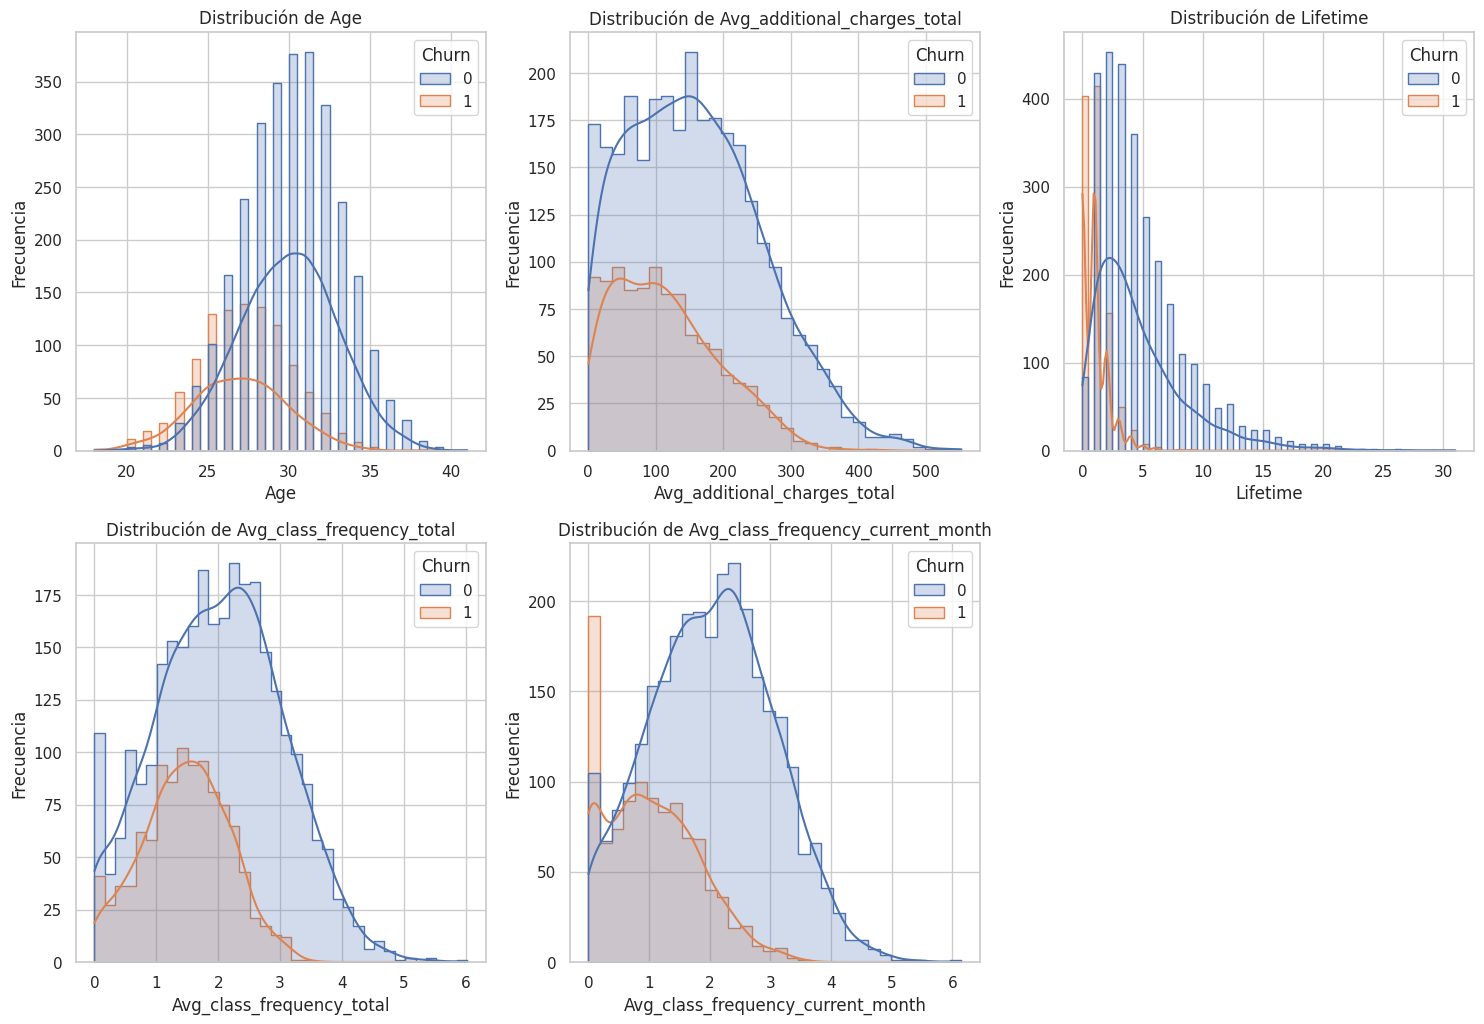

In [6]:
sns.set(style="whitegrid")

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Seleccionar algunas características para graficar
columnas = ['Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for ax, col in zip(axes, columnas):
    sns.histplot(data=gym, x=col, hue='Churn', kde=True, ax=ax, element="step")
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Remover subgráficos vacíos si es necesario
for ax in axes[len(columnas):]:
    fig.delaxes(ax)

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Crea una matriz de correlación y muéstrala.

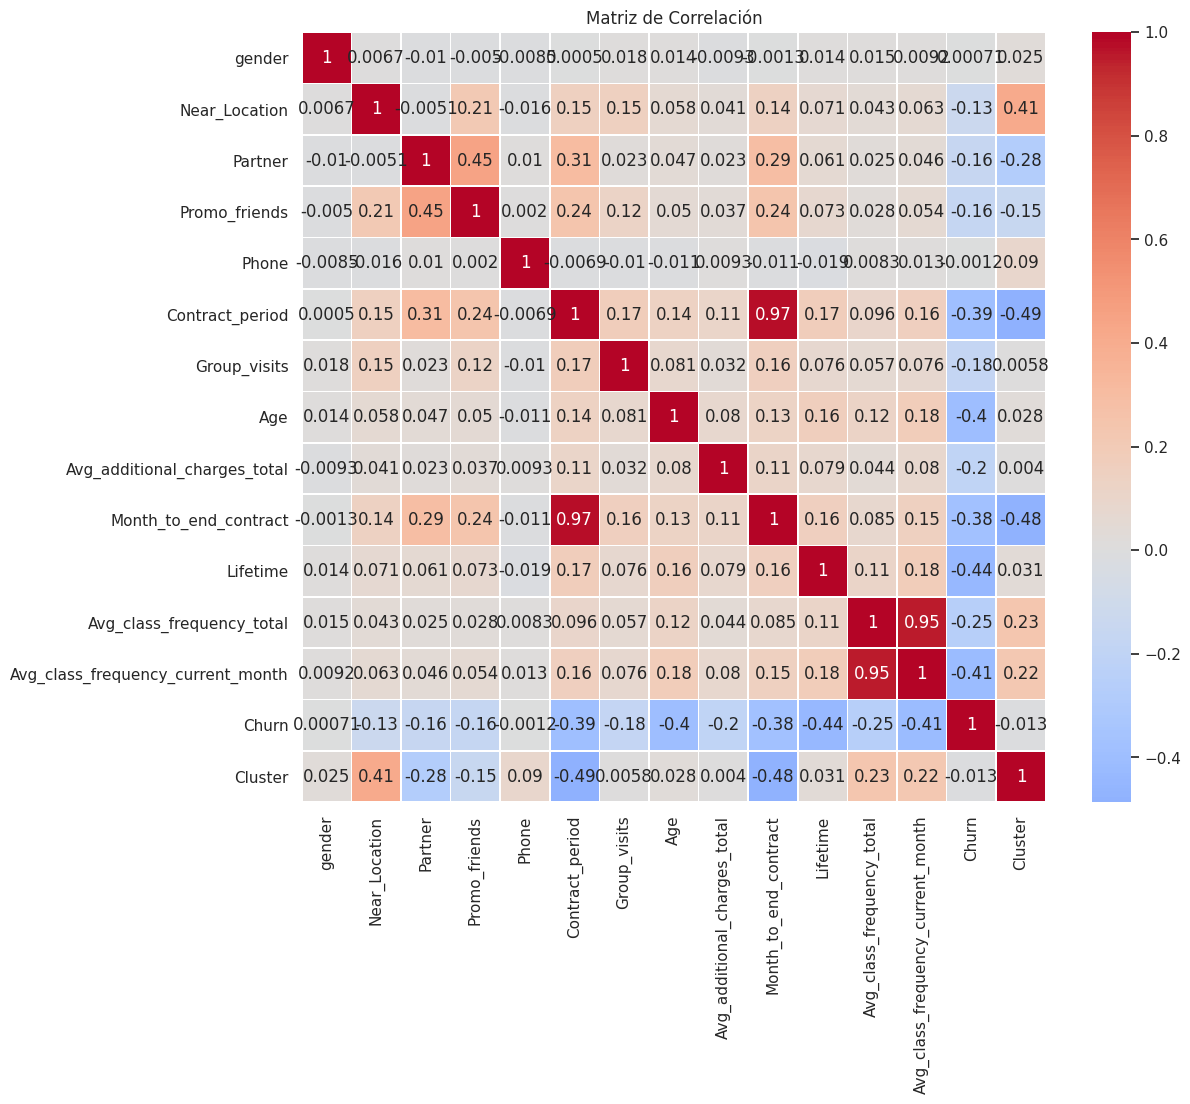

In [20]:
# Calcular la matriz de correlación
correlation_matrix = gym.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Paso 3. Construir un modelo para predecir la cancelación de usuarios

# Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

# # Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



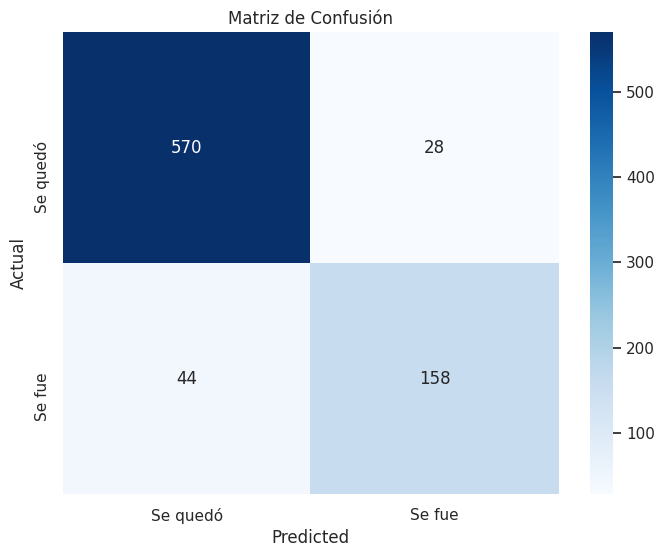

In [8]:
# Seleccionar las características y la característica objetivo
X = gym.drop(columns=['Churn'])
y = gym['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de clasificación
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Se quedó', 'Se fue'], yticklabels=['Se quedó', 'Se fue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Entrena el modelo en el set de entrenamiento con dos métodos:
regresión logística;
bosque aleatorio.

Regresión Logística:
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800



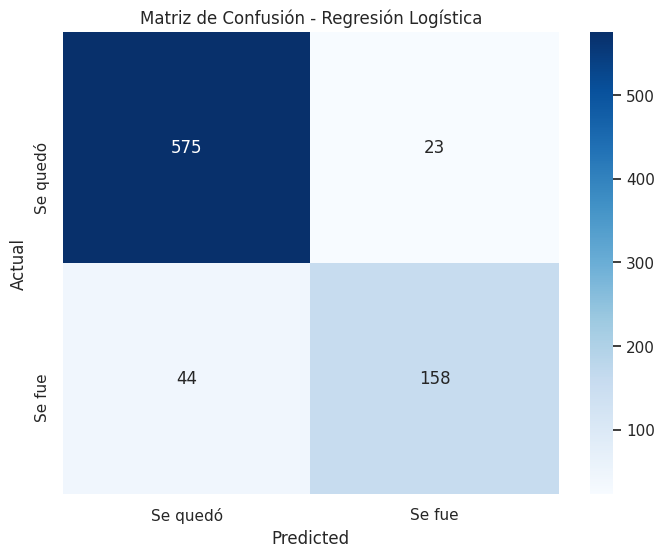

Bosque Aleatorio:
Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



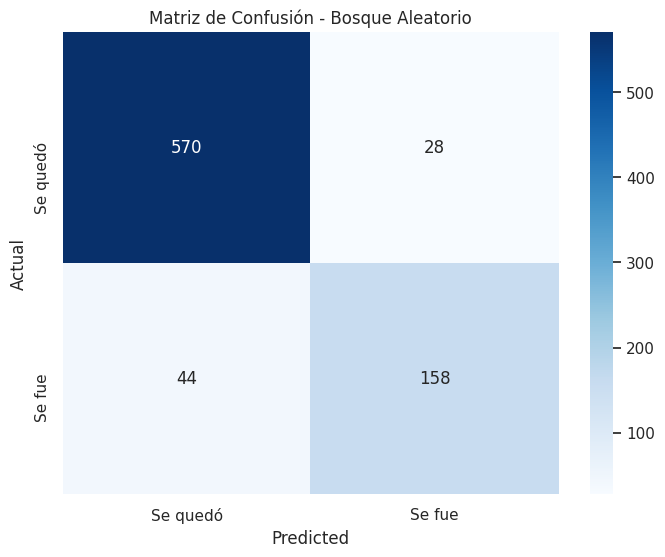

In [9]:
X = gym.drop(columns=['Churn'])
y = gym['Churn']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar y evaluar el modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)

print("Regresión Logística:")
print(f"Accuracy: {accuracy_logreg:.2f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_logreg))

# Mostrar la matriz de confusión para Regresión Logística
conf_matrix_logreg = confusion_matrix(y_val, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Se quedó', 'Se fue'], yticklabels=['Se quedó', 'Se fue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# Entrenar y evaluar el modelo de Bosque Aleatorio
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)

print("Bosque Aleatorio:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

# Mostrar la matriz de confusión para Bosque Aleatorio
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Se quedó', 'Se fue'], yticklabels=['Se quedó', 'Se fue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Bosque Aleatorio')
plt.show()

Precisión:

La precisión para la clase 0 (clientes que permanecen) es del 93%. Esto implica que de cada 100 predicciones sobre clientes no marchados, el 93% son acertadas.
En la clase 1 (clientes que han dado de baja), se ha obtenido una precisión del 87%, lo cual significa que el 87% de las veces, nuestras predicciones sobre un cliente dando de baja han sido correctas.
Recall:

El modelo identificó correctamente al 96% de los clientes que no se han marchado en la clase 0, según su recall.
El 78% de los clientes que se han marchado fueron correctamente identificados, según el recall de la clase 1.
F1-Score:

La puntuación f1-score de la clase 0 es de 0. 94, demostrando un balance entre exactitud y recuperación.
El f1-score de la clase 1 es de 0. La clase 1 tiene un balance adecuado entre la precisión y el recall, aunque es ligeramente más bajo que el de la clase 0.
Además, el promedio ponderado de las métricas demuestra una alta efectividad del modelo en su conjunto.

Bosque Aleatorio
El rendimiento del modelo de bosque aleatorio es comparable al de la regresión logística, alcanzando una precisión del 91%. Los resultados del informe de clasificación son los siguientes:Los resultados del informe de clasificación son los siguientes:

Precisión:

En la clase 0, se obtiene una precisión del 93%, lo cual demuestra una gran exactitud al predecir que un cliente no ha abandonado.
En la clase 1, la tasa de precisión es del 85%, mostrando una leve reducción respecto a la regresión logística.

# Paso 4. Crear clústeres de usuarios/as

# Estandariza los datos.

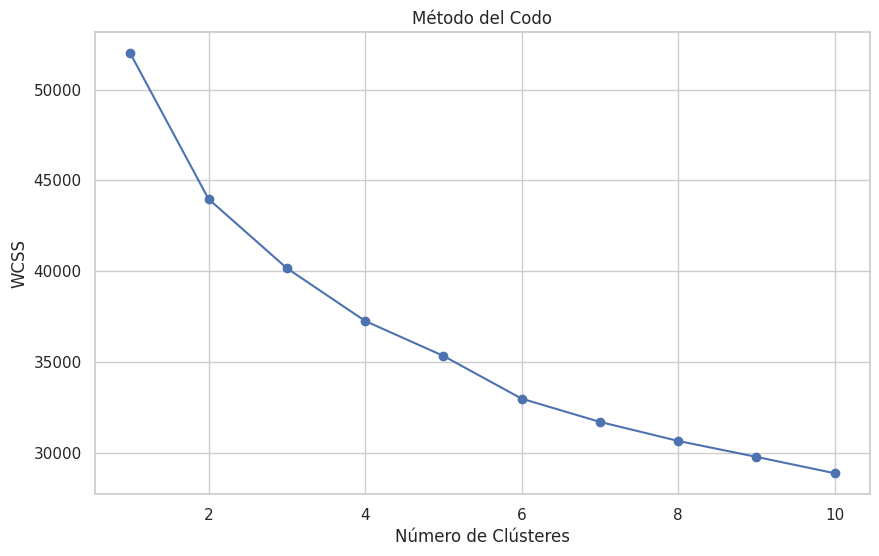

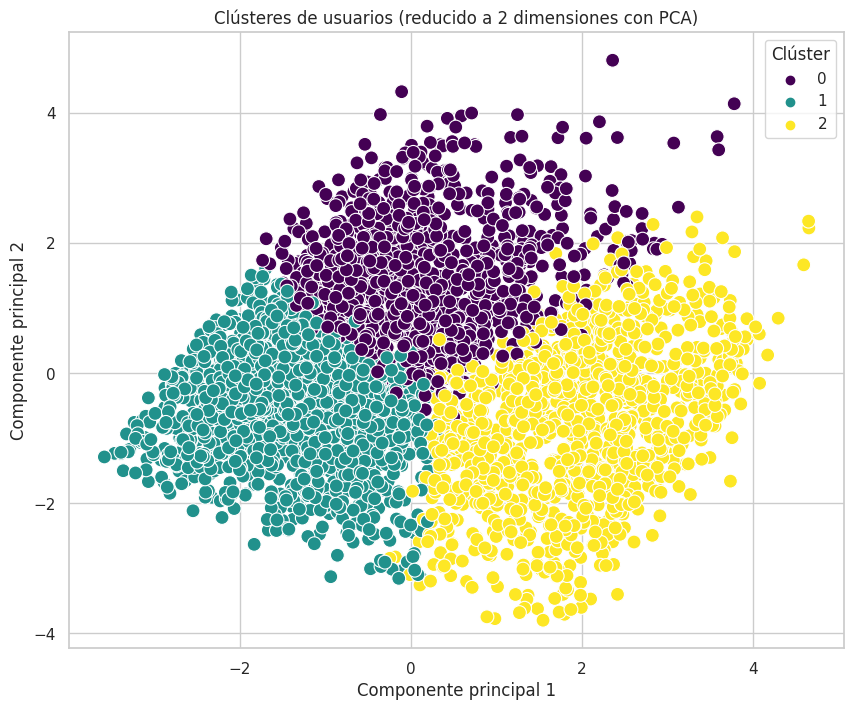

In [10]:
X = gym.drop(columns=['Churn'])

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo para encontrar el número óptimo de clústeres
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.show()

# Aplicar KMeans con el número óptimo de clústeres (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Agregar las etiquetas de clúster al DataFrame original
gym['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gym['Cluster'], palette='viridis', s=100)
plt.title('Clústeres de usuarios (reducido a 2 dimensiones con PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Clúster')
plt.show()

# Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

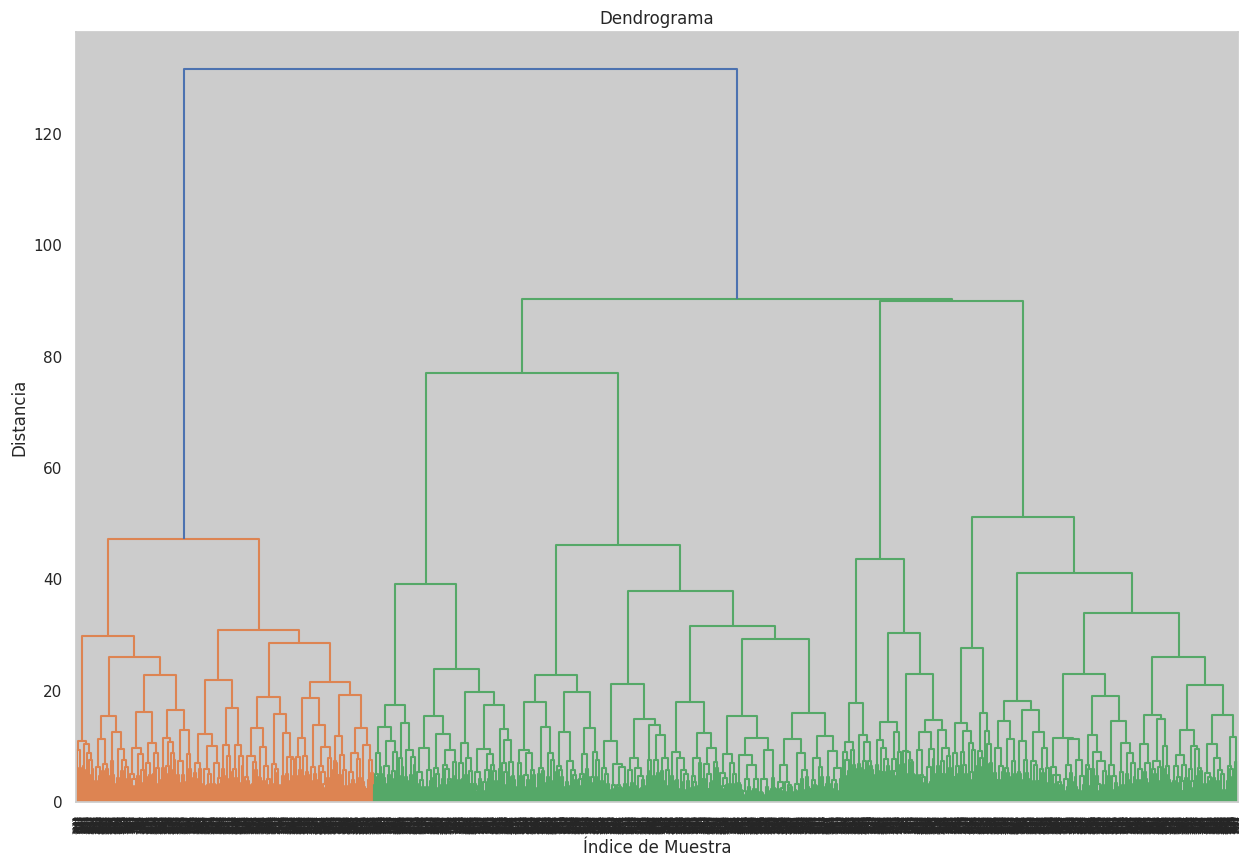

In [11]:
X = gym.drop(columns=['Churn'])

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear una matriz de distancias utilizando la función linkage
Z = linkage(X_scaled, method='ward')

# Trazar el dendrograma
plt.figure(figsize=(15, 10))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

# Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.) 

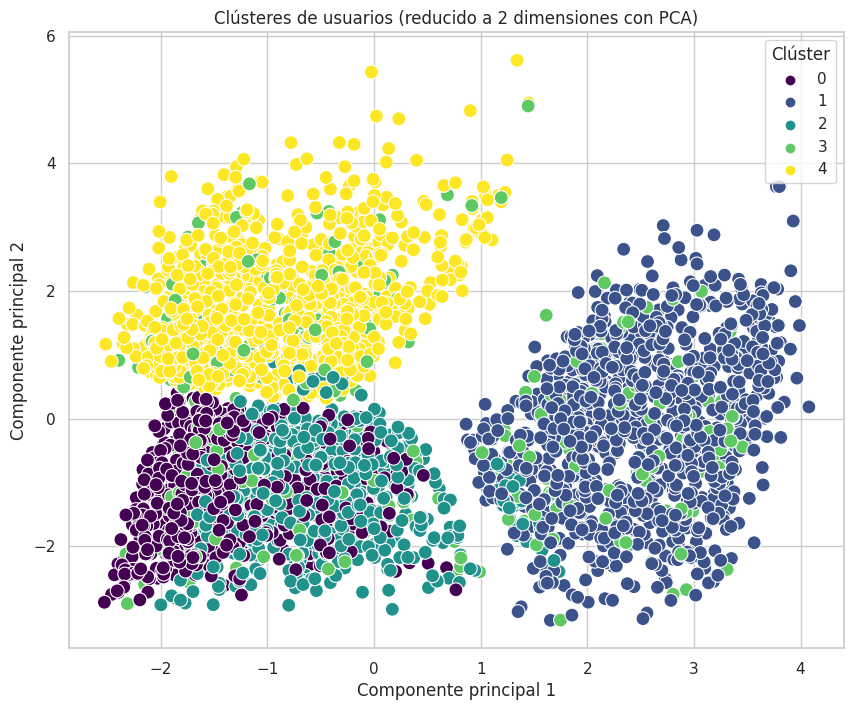

In [12]:
X = gym.drop(columns=['Churn'])

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar el modelo K-means con n=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Predecir los clústeres
clusters = kmeans.predict(X_scaled)

# Agregar las etiquetas de clúster al DataFrame original
gym['Cluster'] = clusters

# Visualización de los clústeres en un par de dimensiones (por ejemplo, PCA para reducción de dimensionalidad)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gym['Cluster'], palette='viridis', s=100)
plt.title('Clústeres de usuarios (reducido a 2 dimensiones con PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Clúster')
plt.show()

# Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [13]:
cluster_means = gym.groupby('Cluster').mean()

# Mostrar los resultados
display("Valores medios de características para cada clúster:")
display(cluster_means)

'Valores medios de características para cada clúster:'

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.478214,0.789760,0.000000,0.084967,1.000000,1.793028,0.299564,28.016340,128.985043,1.714597,2.119826,1.222707,0.954215,0.598039
1,0.500000,0.942966,0.772814,0.562738,0.990494,10.876426,0.548479,29.949620,162.623730,9.934411,4.796578,2.002106,1.995736,0.024715
2,0.503215,0.720257,1.000000,0.414791,1.000000,2.173633,0.282958,28.189711,129.622443,2.048232,2.485531,1.230696,1.015159,0.475884
3,0.525333,0.858667,0.456000,0.288000,0.000000,4.594667,0.413333,29.237333,141.812997,4.285333,3.797333,1.828592,1.693505,0.274667
4,0.547919,0.865440,0.330106,0.191675,0.999032,2.480155,0.451113,30.022265,159.226955,2.308809,4.779284,2.745599,2.735944,0.084221


# Traza distribuciones de características para los clústeres.

<Figure size 1500x1000 with 0 Axes>

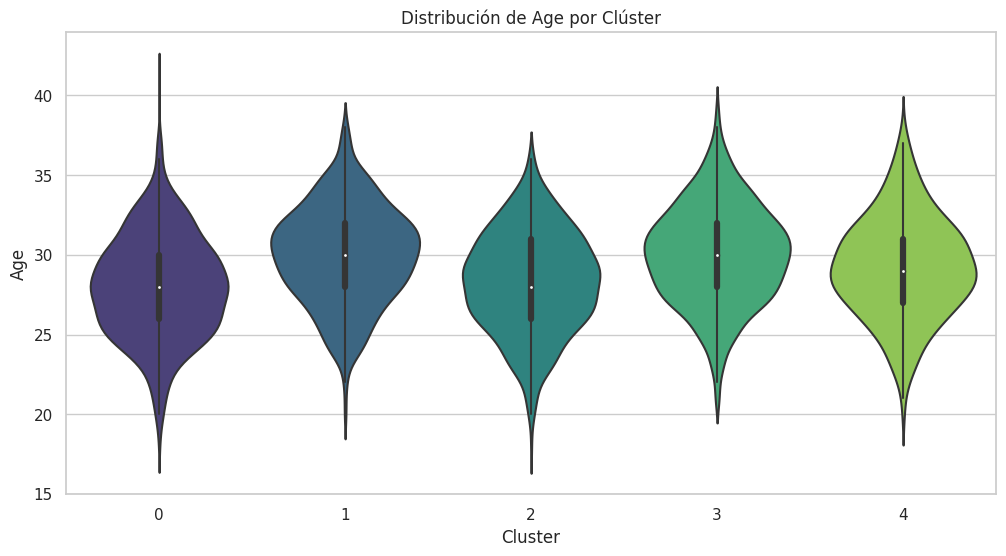

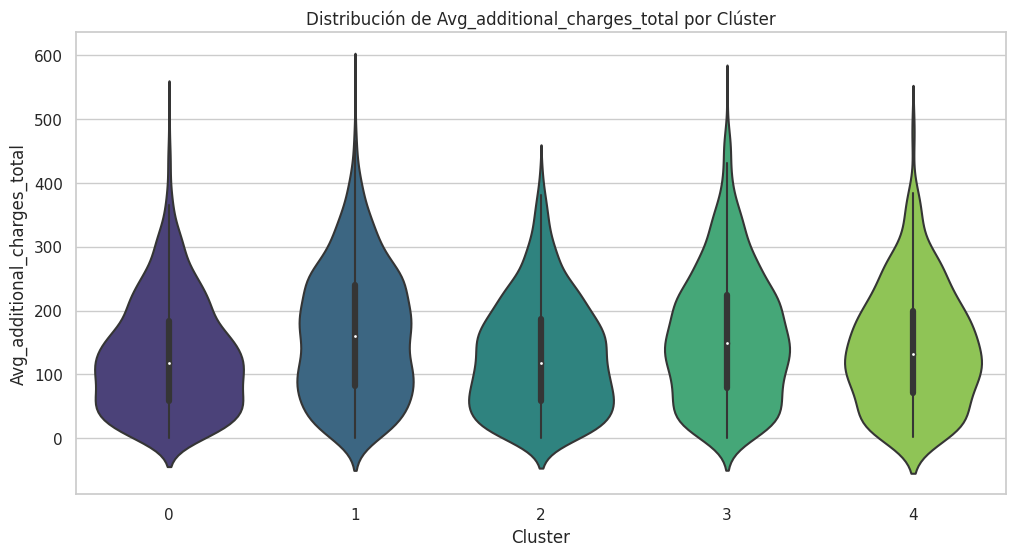

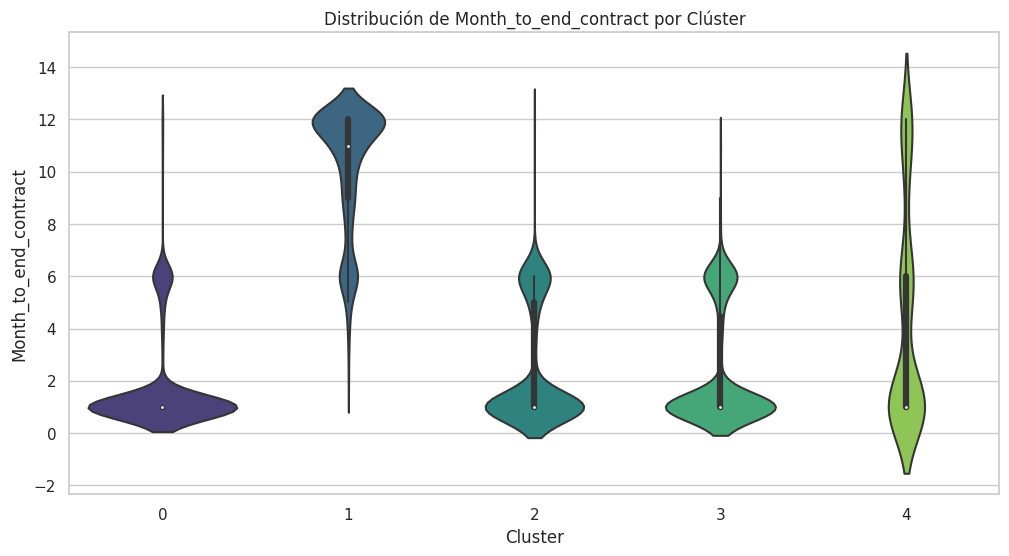

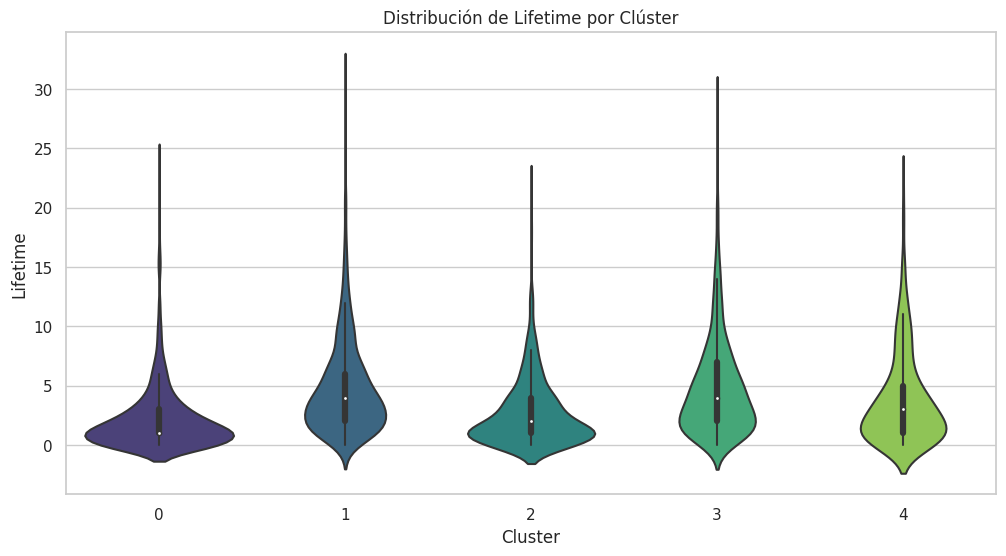

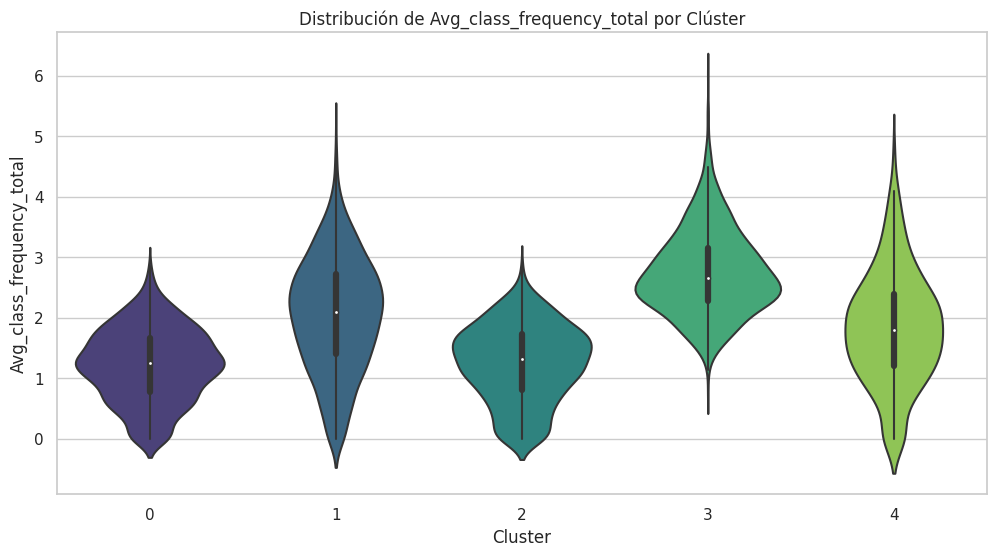

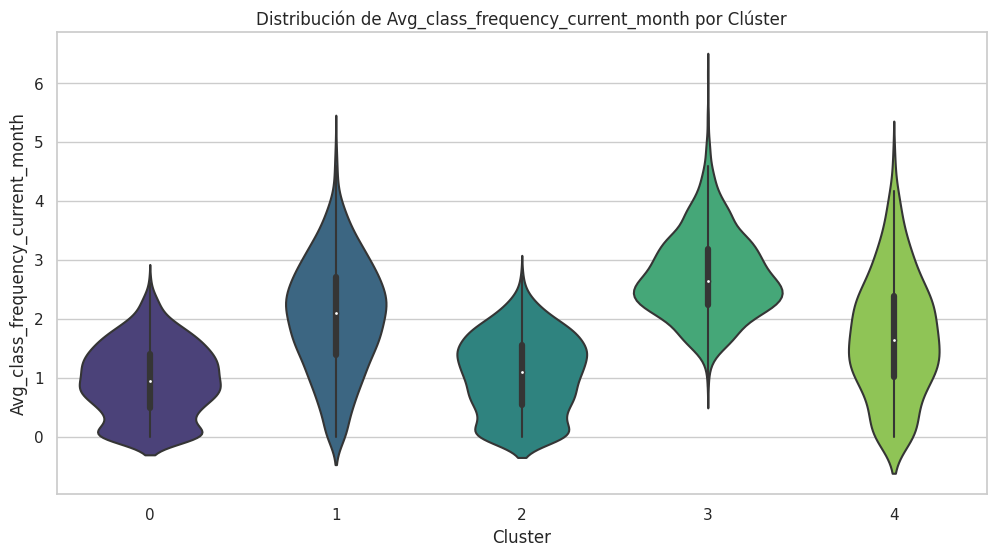

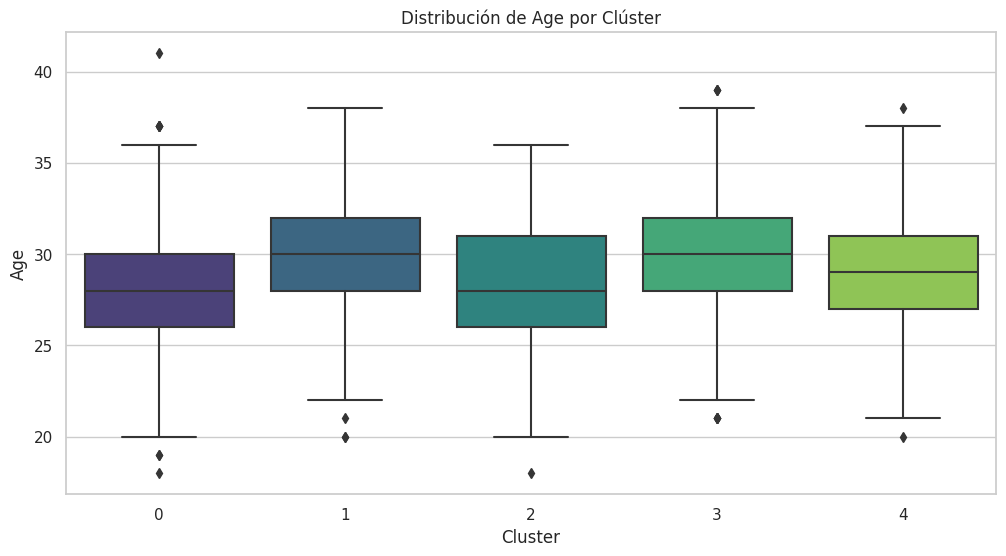

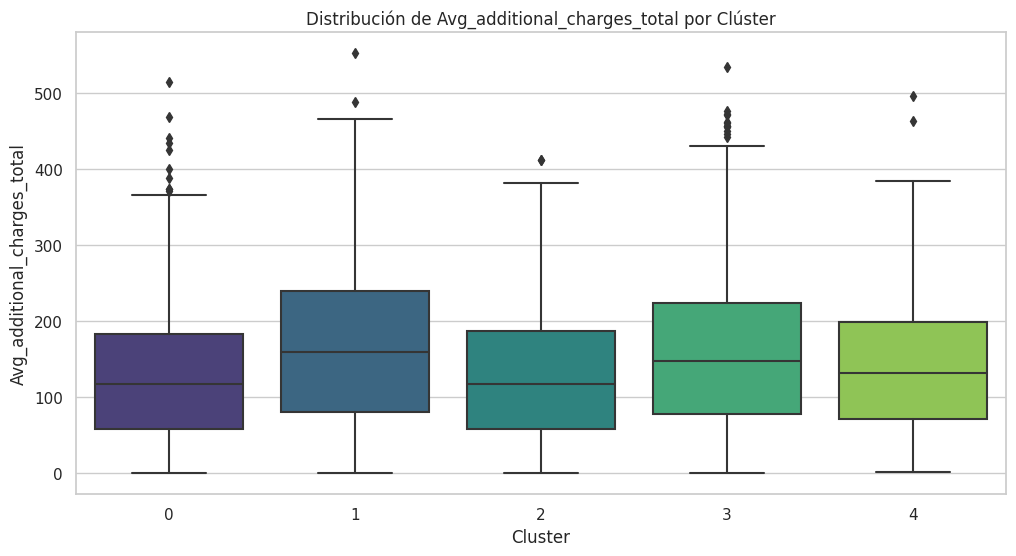

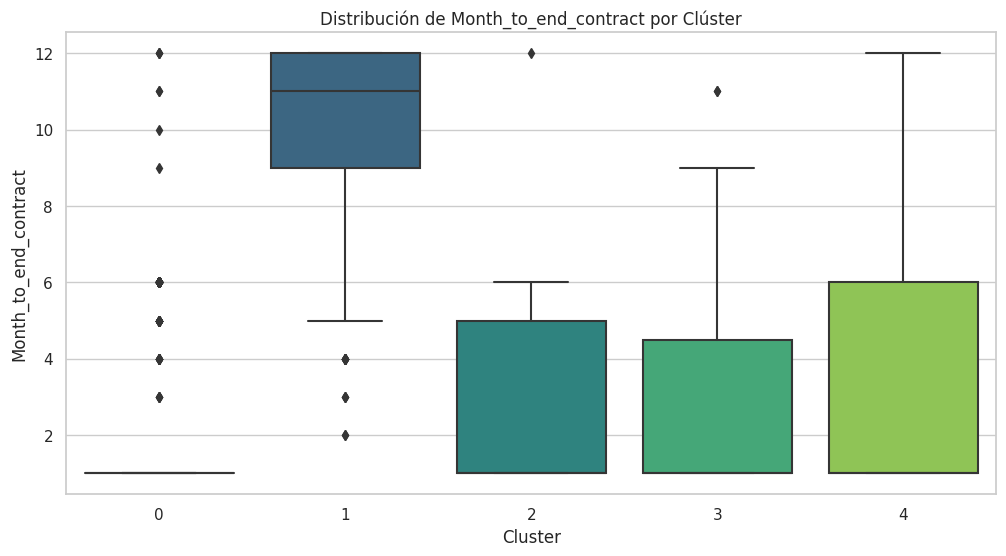

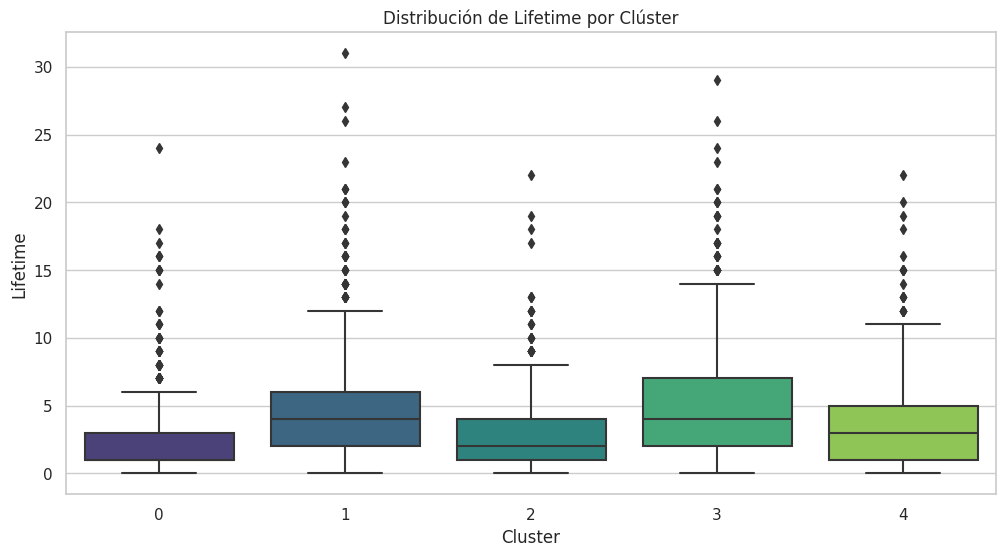

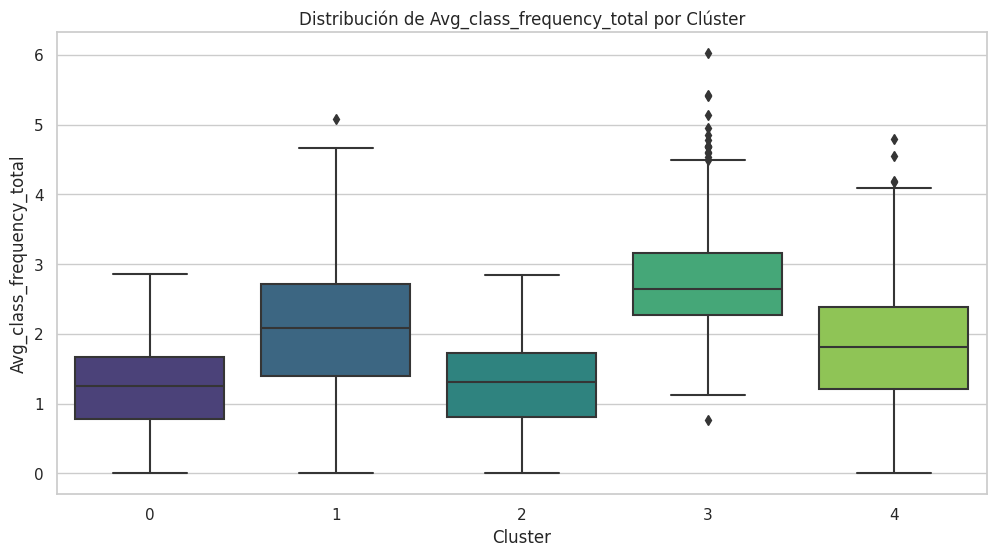

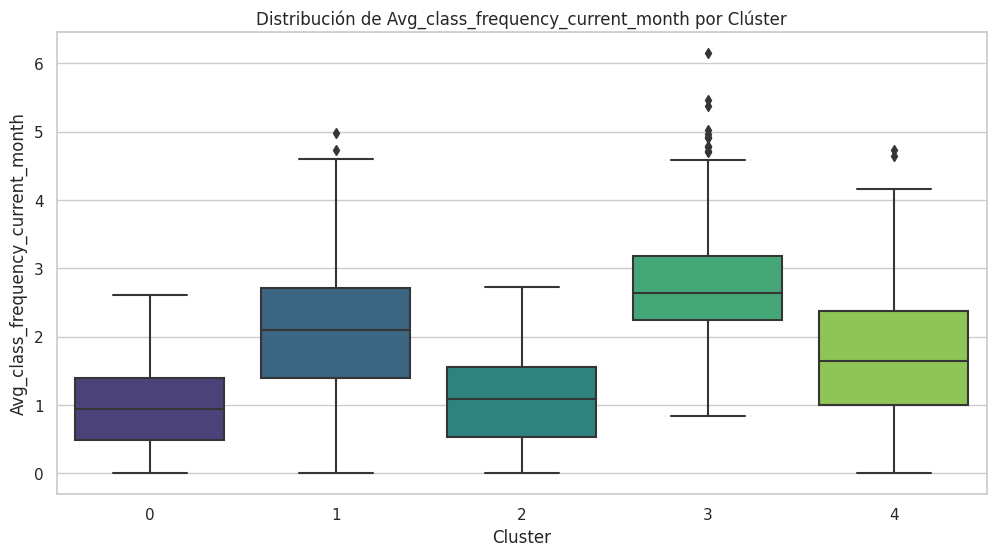

In [14]:
X = gym.drop(columns=['Churn'])

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar el modelo K-means con n=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Predecir los clústeres
clusters = kmeans.predict(X_scaled)

# Agregar las etiquetas de clúster al DataFrame original
gym['Cluster'] = clusters

# Configurar la visualización
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Trazar gráficos de violín para algunas características seleccionadas
features = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Cluster', y=feature, data=gym, palette='viridis')
    plt.title(f'Distribución de {feature} por Clúster')
    plt.show()

# También puedes utilizar gráficos de caja (box plots)
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=feature, data=gym, palette='viridis')
    plt.title(f'Distribución de {feature} por Clúster')
    plt.show()

#notas algo? Si un clúster tiene usuarios más jóvenes, podrían preferir actividades o promociones diferentes a las de un clúster con usuarios de mayor edad.
Los usuarios que gastan más en servicios adicionales podrían estar más comprometidos y podrían beneficiarse de ofertas especiales en servicios adicionales.
Clústeres con más tiempo restante podrían estar menos preocupados por la renovación inmediata, mientras que aquellos con menos tiempo podrían necesitar incentivos para renovar.
Los usuarios que han estado más tiempo podrían ser más leales y podrían ser buenos candidatos para programas de fidelización.


# Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()).

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gym.drop(columns=['Churn']))

# Entrenar el modelo K-means con n=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Predecir los clústeres
clusters = kmeans.predict(X_scaled)

# Agregar las etiquetas de clúster al DataFrame original
gym['Cluster'] = clusters

# Calcular la tasa de cancelación para cada clúster
cancel_rate = gym.groupby('Cluster')['Churn'].mean()

# Mostrar los resultados
display("Tasa de cancelación para cada clúster:")
display(cancel_rate)

'Tasa de cancelación para cada clúster:'

Cluster
0    0.417582
1    0.595445
2    0.022312
3    0.273936
4    0.084008
Name: Churn, dtype: float64

Tasa de cancelación para cada clúster:
Cluster
0    0.084008
1    0.503937
2    0.021739
3    0.548718
4    0.266839
Name: Churn, dtype: float64


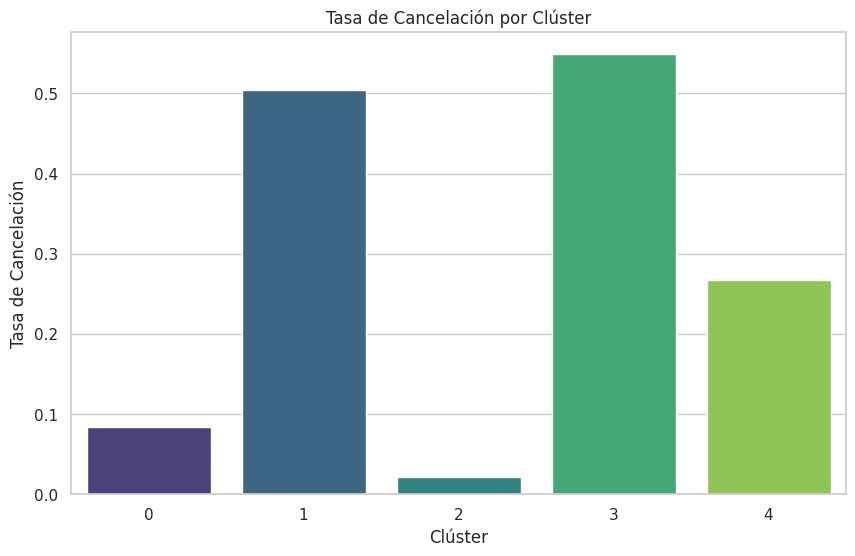

In [16]:
#¿Difieren en términos de tasa de cancelación?  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gym.drop(columns=['Churn']))

# Entrenar el modelo K-means con n=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Predecir los clústeres
clusters = kmeans.predict(X_scaled)

# Agregar las etiquetas de clúster al DataFrame original
gym['Cluster'] = clusters

# Calcular la tasa de cancelación para cada clúster
cancel_rate = gym.groupby('Cluster')['Churn'].mean()

# Mostrar los resultados
print("Tasa de cancelación para cada clúster:")
print(cancel_rate)

# Visualizar las tasas de cancelación
plt.figure(figsize=(10, 6))
sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette='viridis')
plt.xlabel('Clúster')
plt.ylabel('Tasa de Cancelación')
plt.title('Tasa de Cancelación por Clúster')
plt.show()

# ¿Qué grupos son propensos a irse y cuáles son leales?

Tasa de cancelación para cada clúster:
Cluster
0    0.548223
1    0.023116
2    0.263021
3    0.516653
4    0.085341
Name: Churn, dtype: float64


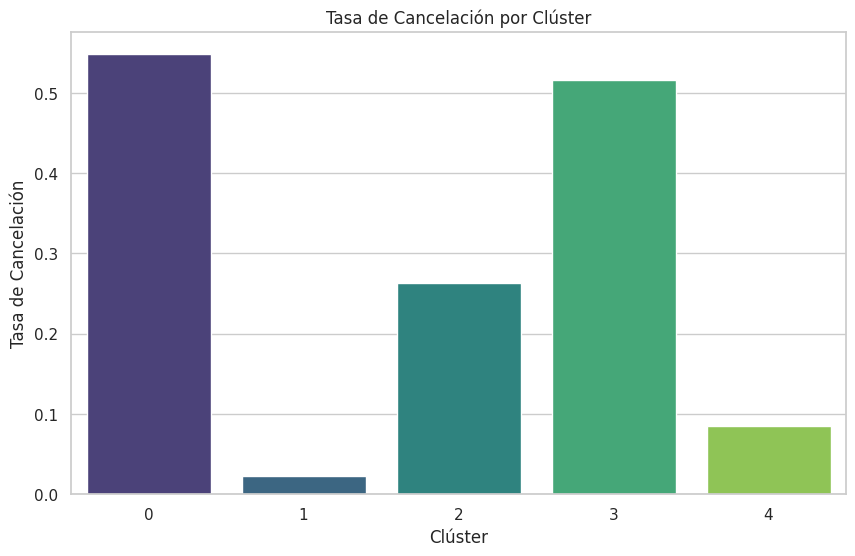

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gym.drop(columns=['Churn']))

# Entrenar el modelo K-means con n=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Predecir los clústeres
clusters = kmeans.predict(X_scaled)

# Agregar las etiquetas de clúster al DataFrame original
gym['Cluster'] = clusters

# Calcular la tasa de cancelación para cada clúster
cancel_rate = gym.groupby('Cluster')['Churn'].mean()

# Mostrar los resultados
print("Tasa de cancelación para cada clúster:")
print(cancel_rate)

# Visualizar las tasas de cancelación
plt.figure(figsize=(10, 6))
sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette='viridis')
plt.xlabel('Clúster')
plt.ylabel('Tasa de Cancelación')
plt.title('Tasa de Cancelación por Clúster')
plt.show()

Cada clúster presenta desafíos y oportunidades únicos. Implementar estrategias personalizadas basadas en el análisis de la tasa de cancelación permitirá a Model Fitness no solo reducir la pérdida de clientes, sino también mejorar la satisfacción y la fidelización a largo plazo. La combinación de encuestas, programas de fidelización, y análisis de comportamiento ofrecerá un enfoque integral para abordar las necesidades específicas de cada grupo de clientes.








#  Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

Centrarse en los grupos de usuarios con mayor probabilidad de cancelación al dirigir los esfuerzos de retención. Ejemplo: Para los clústeres identificados con alta tasa de cancelación, se podrían proporcionar recompensas personalizadas, como renovaciones de contrato a un precio reducido o beneficios adicionales en servicios. Personalizar la Comunicación y Ofertas Basadas en el Comportamiento del Usuario: Enfoque: Adaptar la comunicación y las ofertas en función de las características únicas de cada clúster. Ejemplo: Enviar sugerencias adaptadas de clases y servicios adicionales a los usuarios que asisten regularmente a nuestras clases.